# Ejercicio 3 -   Regresión Lineal con Keras

En este ejercicio, tu objetivo será entrenar modelos de Regresión Lineal utilizando Keras (y Tensorflow como backend) para familiarizarte con la librería y comprender la relación de sus clases y métodos con los que definimos en los ejercicios 1 y 2.



In [1]:
%load_ext autoreload 
%autoreload 2
!pip install -q rnutil
import rnutil

%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


rnutil: Los archivos de los conjuntos de datos que ofrece este paquete también están disponibles en https://github.com/facundoq/redes-neuronales-util/tree/main/rnutil/data para descargar de forma individual
rnutil: Agregando el parámetro local=True en las funciones rnutil.load_dataset_numpy, rnutil.load_dataset_pandas y rnutil.load_image se puede cargar una versión local de un archivo en lugar de la versión que ofrece este paquete.


# Creando modelos de regresión y prediciendo valores

El siguiente codigo crea modelos de Keras con distintos valores de `w` y `b` y verifica su salida.

Para crear un modelo de Keras utilizamos la clase `Sequential`, que permite utilizar modelos de varias capas. No obstante, en este caso vamos a crear modelos con una sola capa, la capa de clase `Dense` (también conocida como `fully connected` o `lineal`), que permite hacer regresión lineal con varias variables de entrada y de salida. 

Al crear la capa, especificamos la dimensionalidad de salida (1 en este caso) y la de entrada (2 en este caso). De esta forma el modelo puede crear e inicializar los parámetros `W` y `b`.

Como estamos probando un modelo puramente lineal, especificamos `activation=None` para que Keras no agregue ninguna función no-lineal a la salida.

Por último, utilizamos los parámetros por nombre `kernel_initializer` y `bias_initializer` de la clase `Dense` para especificar como inicializar los parámetros `w` (kernel) y `b` (bias) respectivamente. En este caso, utilizamos `keras.initializers.Constant` para inicializarlo con algunos valores constantes.

Ejecuta el siguiente bloque para verificar que en las 4 pruebas la función `predict` de los modelos de Keras hace lo mismo que la función `forward` vista anteriormente. En cada una de las pruebas, estamos inicializando el modelo con distintos valores de `w` y `b`.

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

x=np.array([[1.0,2.0]
            ,[2.0,3.0]
            ,[3.0,4.0]])
dimensionalidad_salida=1
dimensionalidad_entrada=(2,)

# PRUEBA 1
# Defino un modelo con w=(0,0) y b=0
model1 = keras.Sequential([
    keras.layers.Dense(dimensionalidad_salida
                       # dimensionalidad de la entrada
                       ,input_shape=dimensionalidad_entrada
                       # activation=None para que no tenga f de activacion (r lineal)
                       ,activation=None 
                       # inicializo w=(0,0)
                      , kernel_initializer = keras.initializers.Constant(value=0)
                       # inicializo b=0
                      , bias_initializer   = keras.initializers.Constant(value=0))
])
y_prediccion = model1.predict(x)
y=np.zeros((3,1))
rnutil.verificar_igualdad(y,y_prediccion)

  
# PRUEBA 2
# Defino un modelo con w=(1,1) y b=0
model2 = keras.Sequential([
    keras.layers.Dense(dimensionalidad_salida
                       ,input_shape=dimensionalidad_entrada
                       , activation=None
                      , kernel_initializer = keras.initializers.Constant(value=1)
                      , bias_initializer   = keras.initializers.Constant(value=0))
])

y_prediccion = model2.predict(x)
y=np.array([[3.0,5.0,7.0]]).T
rnutil.verificar_igualdad(y,y_prediccion)

# PRUEBA 3
# Defino un modelo con w=(0,0) y b=1
model3 = keras.Sequential([
    keras.layers.Dense(dimensionalidad_salida
                       ,input_shape=dimensionalidad_entrada
                       , activation=None
                      , kernel_initializer = keras.initializers.Constant(value=0)
                      , bias_initializer   = keras.initializers.Constant(value=1))
])
y=np.ones((3,1))
y_prediccion = model3.predict(x)
rnutil.verificar_igualdad(y,y_prediccion)

# PRUEBA 4
# Defino un modelo con w=(1,1) y b=1
model4 = keras.Sequential([
    keras.layers.Dense(dimensionalidad_salida
                       ,input_shape=dimensionalidad_entrada
                       , activation=None
                      , kernel_initializer = keras.initializers.Constant(value=1)
                      , bias_initializer   = keras.initializers.Constant(value=1))
])
y_prediccion = model4.predict(x)
y=np.array([[4.0,6.0,8.0]]).T
rnutil.verificar_igualdad(y,y_prediccion)


2022-04-06 18:07:10.569495: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-06 18:07:10.569521: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-06 18:07:11.770246: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-06 18:07:11.770275: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-06 18:07:11.770291: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ryzen): /proc/driver/nvidia/version does not exist
2022-04-06 18:07:11.770463: I tensorflow/core/platform/cpu_feature_guar

Los vectores x e y son iguales:
x:  [[0.]
 [0.]
 [0.]]
y:  [[0.]
 [0.]
 [0.]]
Los vectores x e y son iguales:
x:  [[3.]
 [5.]
 [7.]]
y:  [[3.]
 [5.]
 [7.]]
Los vectores x e y son iguales:
x:  [[1.]
 [1.]
 [1.]]
y:  [[1.]
 [1.]
 [1.]]
Los vectores x e y son iguales:
x:  [[4.]
 [6.]
 [8.]]
y:  [[4.]
 [6.]
 [8.]]


# Entrenar un modelo de Regresión Lineal con Keras para el dataset de estudio 2D

El siguiente código carga un dataset de prueba con 2 dimensiones de entrada y una de salida.

Luego crea un modelo de regresión lineal con Keras, y visualiza sus pesos iniciales. 

Es importante notar tres cosas:

1. La métrica utilizada es `'mse'`, es decir el error cuadrático medio o promedio. Esta es la misma métrica vista en la teoría de Regresión Lineal.

2. El optimizador es una clase que define el algoritmo para minimizar el error cuadrático. En general, son todas variantes de descenso de gradiente. En este caso, estamos utilizando descenso de gradiente estocástico (`keras.optimizers.SGD`), que es igual al descenso de gradiente pero realiza cada actualización de los parámetros con un subconjunto de los ejemplos del dataset. 

3. El método para entrenar el modelo es `fit`. En este caso, el parámetro `lr` lo recibe el optimizador, pero `fit` recibe la cantidad de iteraciones (`epochs`) y el tamaño del batch para el SGD (`batch_size`).


Al finalizar el entrenamiento, observá los valores del vector de pesos `w`. ¿A qué atributo o variable de entrada le da más importancia el modelo?

Loading file from package rnutil (/home/facundoq/dev/rnutil/rnutil/data)...
Done
Inicialización aleatoria del modelo; vuelve a correr esta celda para obtener otros resultados


<IPython.core.display.Javascript object>


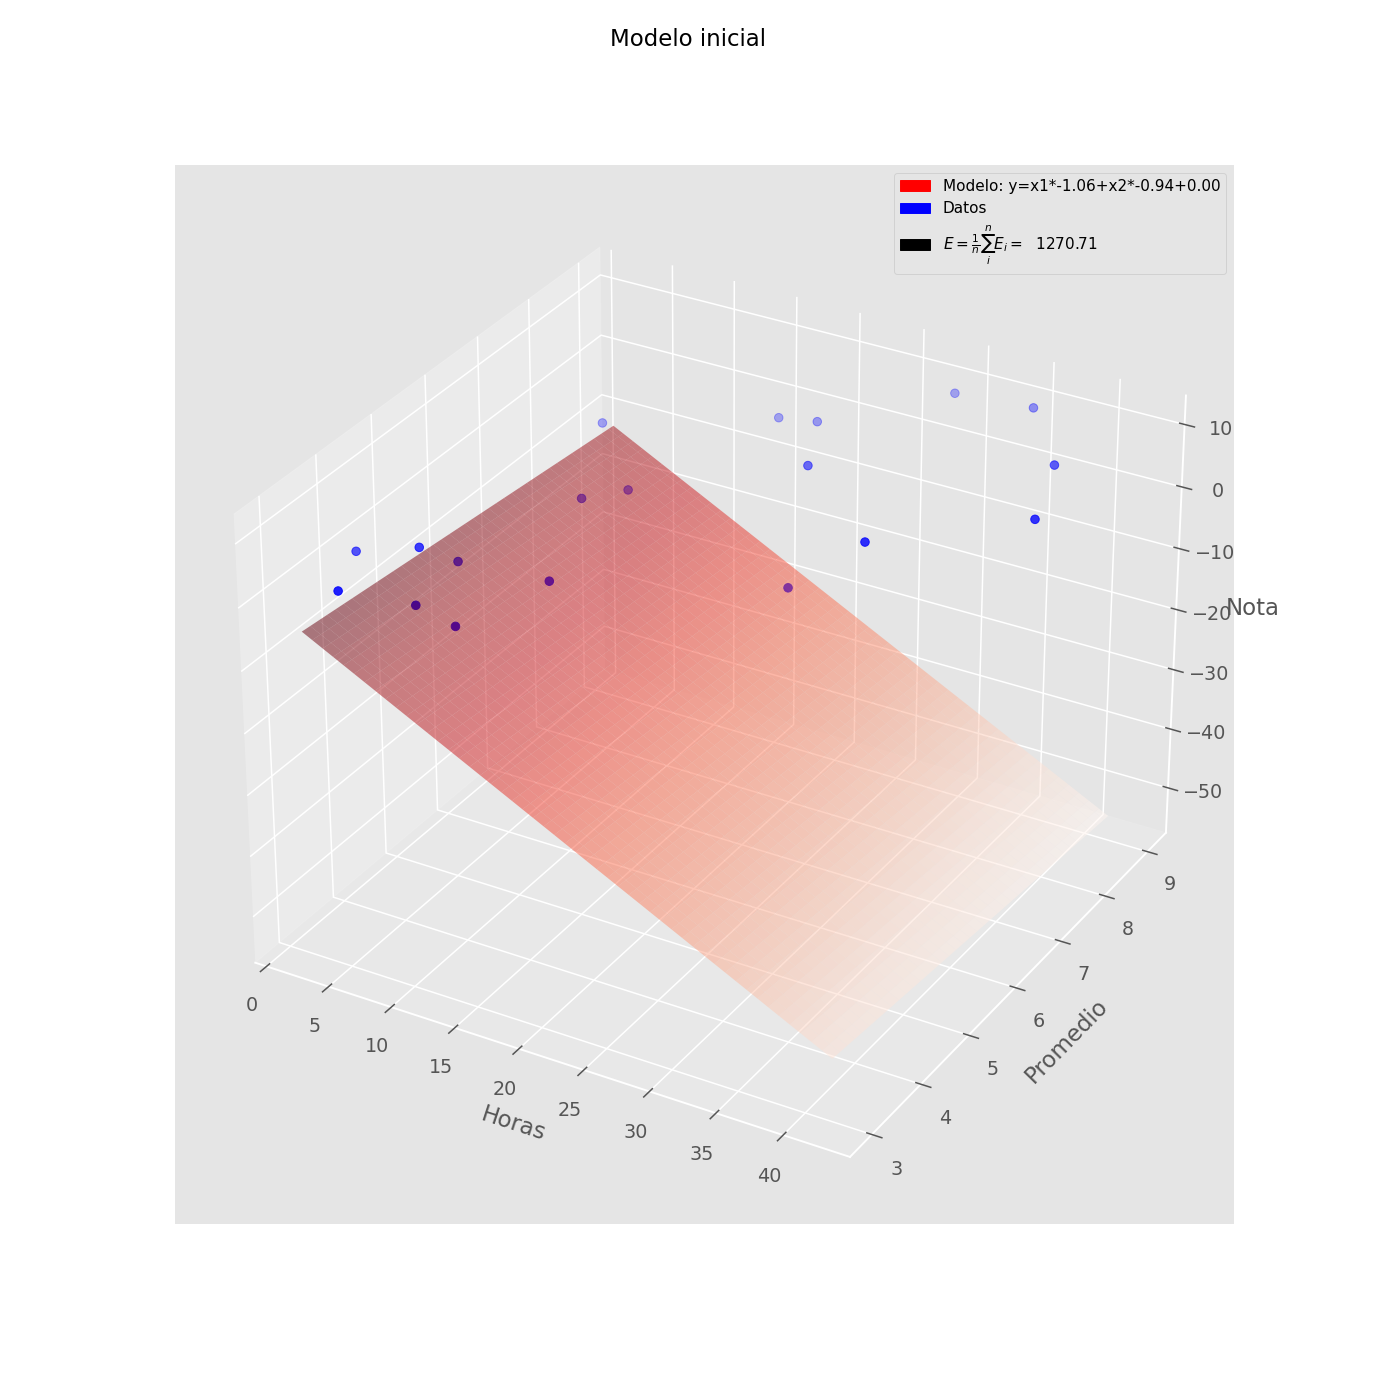

[-1.0645946  -0.94427514]
Epoch 1/15
1/1 [==============================] - 0s 333ms/step - loss: 1330.6100 - mae: 32.7395
Epoch 2/15
1/1 [==============================] - 0s 4ms/step - loss: 35.6264 - mae: 4.4751
Epoch 3/15
1/1 [==============================] - 0s 4ms/step - loss: 9.1232 - mae: 2.7099
Epoch 4/15
1/1 [==============================] - 0s 3ms/step - loss: 8.4209 - mae: 2.5533
Epoch 5/15
1/1 [==============================] - 0s 4ms/step - loss: 8.2468 - mae: 2.5469
Epoch 6/15
1/1 [==============================] - 0s 4ms/step - loss: 8.0868 - mae: 2.5194
Epoch 7/15
1/1 [==============================] - 0s 3ms/step - loss: 7.9304 - mae: 2.4952
Epoch 8/15
1/1 [==============================] - 0s 3ms/step - loss: 7.7774 - mae: 2.4708
Epoch 9/15
1/1 [==============================] - 0s 4ms/step - loss: 7.6275 - mae: 2.4468
Epoch 10/15
1/1 [==============================] - 0s 3ms/step - loss: 7.4809 - mae: 2.4230
Epoch 11/15
1/1 [==============================] - 0s 3m

<IPython.core.display.Javascript object>


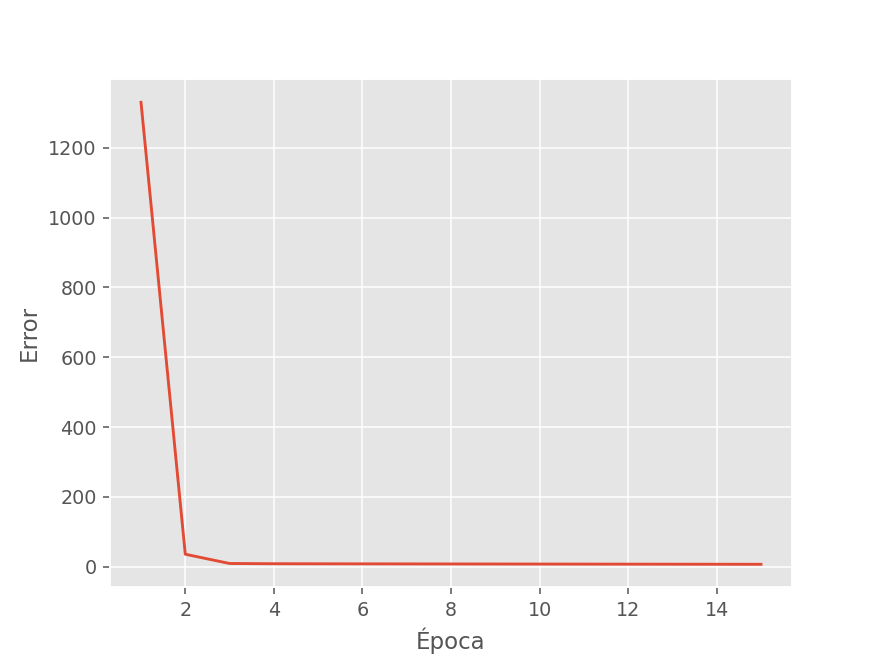

<IPython.core.display.Javascript object>


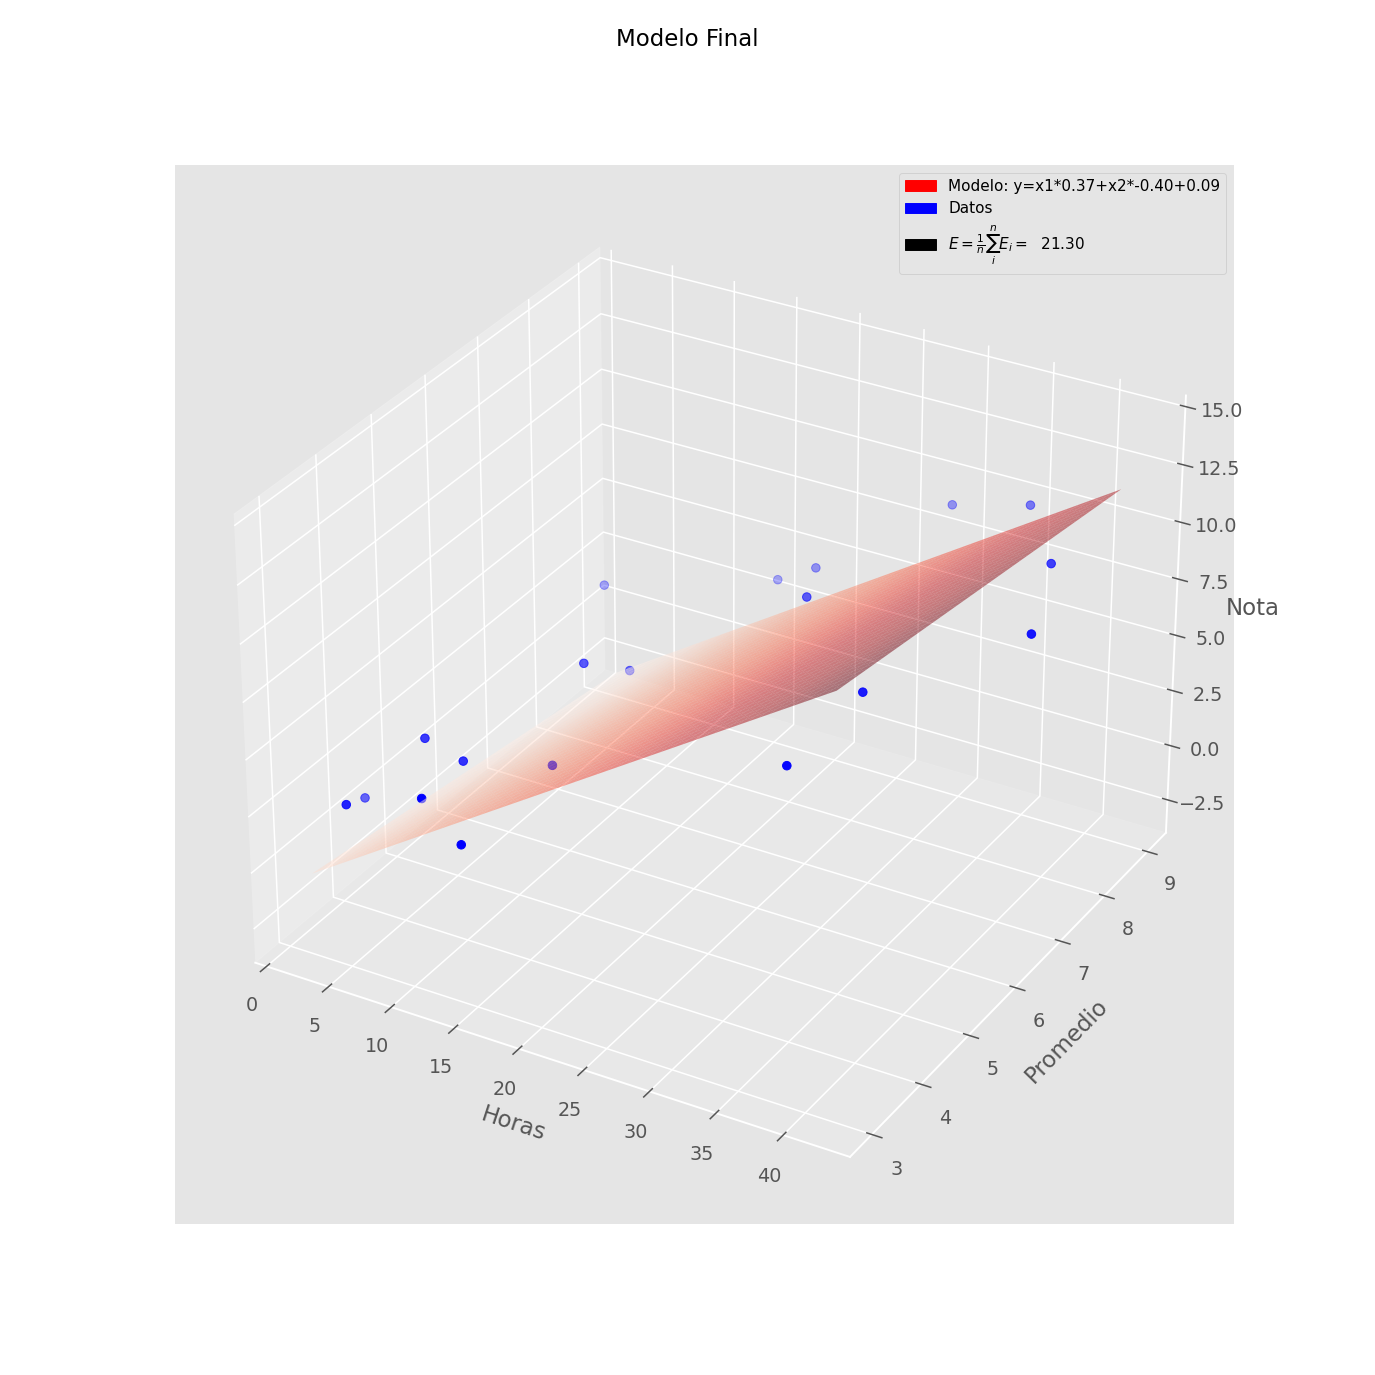

[ 0.3660226  -0.40264234]


In [7]:
# Carga del dataset

import matplotlib.pyplot as plt

data = rnutil.load_dataset_numpy("study_regression_2d_small.csv")

x,y=data[:,0:2],data[:,2:3]
n,d_in=x.shape
n,d_out=y.shape

# Creación del modelo inicial
print("Inicialización aleatoria del modelo; vuelve a correr esta celda para obtener otros resultados")
# Creo un modelo lineal
modelo = keras.Sequential([
    keras.layers.Dense(d_out,input_shape=(d_in,), activation=None)])

# visualización del modelo inicial
mensaje=f"Modelo inicial"
w,b=modelo.get_weights()

rnutil.plot_regresion_lineal(w,b,x[:,0],x[:,1],y,x1_label="Horas",x2_label="Promedio",y_label="Nota",title=mensaje)


#Creo el optimizador y compilo el modelo para usarlo
α=0.001
# Algoritmo de optimización: Descenso de Gradiente Estocástico (Stochastic Gradient Descent)
sgd = keras.optimizers.SGD(learning_rate=α)
# error cuadrático medio es la métrica de error a optimizar
error_metric='mse' # IMPORTANTE

modelo.compile(
  optimizer=sgd,
  loss=error_metric,
  metrics=['mae'], # metricas para ir calculando en cada iteracion o batch (ninguna ahora)
)


# Entrenamiento del modelo
history  = modelo.fit(x,y,epochs=15,batch_size=32)

# dibujar curva de error
rnutil.plot_loss(history.history["loss"])


# visualiza el modelo y los datos
w,b=modelo.get_weights()

rnutil.plot_regresion_lineal(w,b,x[:,0],x[:,1],y,x1_label="Horas",x2_label="Promedio",y_label="Nota",title="Modelo Final")



